# Lecture 26: Assignment 2 Discussion

---

1. **Multivariate Data Analysis & Vizualisation** *(11)*

For the `vehicles` dataset from the `fueleconomy` package in `R`, 

a. develop the following plots *(10)*

- histogram for highway & city MpG

- box plot for highway & city MpG

- bar plot for mean highway & city MpG vs. vehicle year

- line plot for mean highway & city MpG vs. engine cylinders

- scatter plot for highway & city MpG vs. engine displacement

b. evaluate the correlation between *(1)*

- engine displacement and highway & city MpG

- engine cylinders and highway & city MpG

- vehicle year and highway & city MpG

In [1]:
# Vehicles Dataset - Fuel Economy Package
## Load Packages
library(dplyr)
library(ggplot2)
library(patchwork)
library(fueleconomy)

# Load the dataset (filtered for non-zero & non-NA values; augmented with new variable 'I' indicating if vehicle is manufactured after 2009)
data <- fueleconomy::vehicles %>%
  filter(year != 0, cyl != 0, displ != 0, is.na(year) == FALSE, is.na(cyl) == FALSE, is.na(displ) == FALSE) %>%
  mutate(I = ifelse(year > 2009, 1, 0))


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'patchwork' was built under R version 4.5.1"
Warning message:
"package 'fueleconomy' was built under R version 4.5.1"


Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


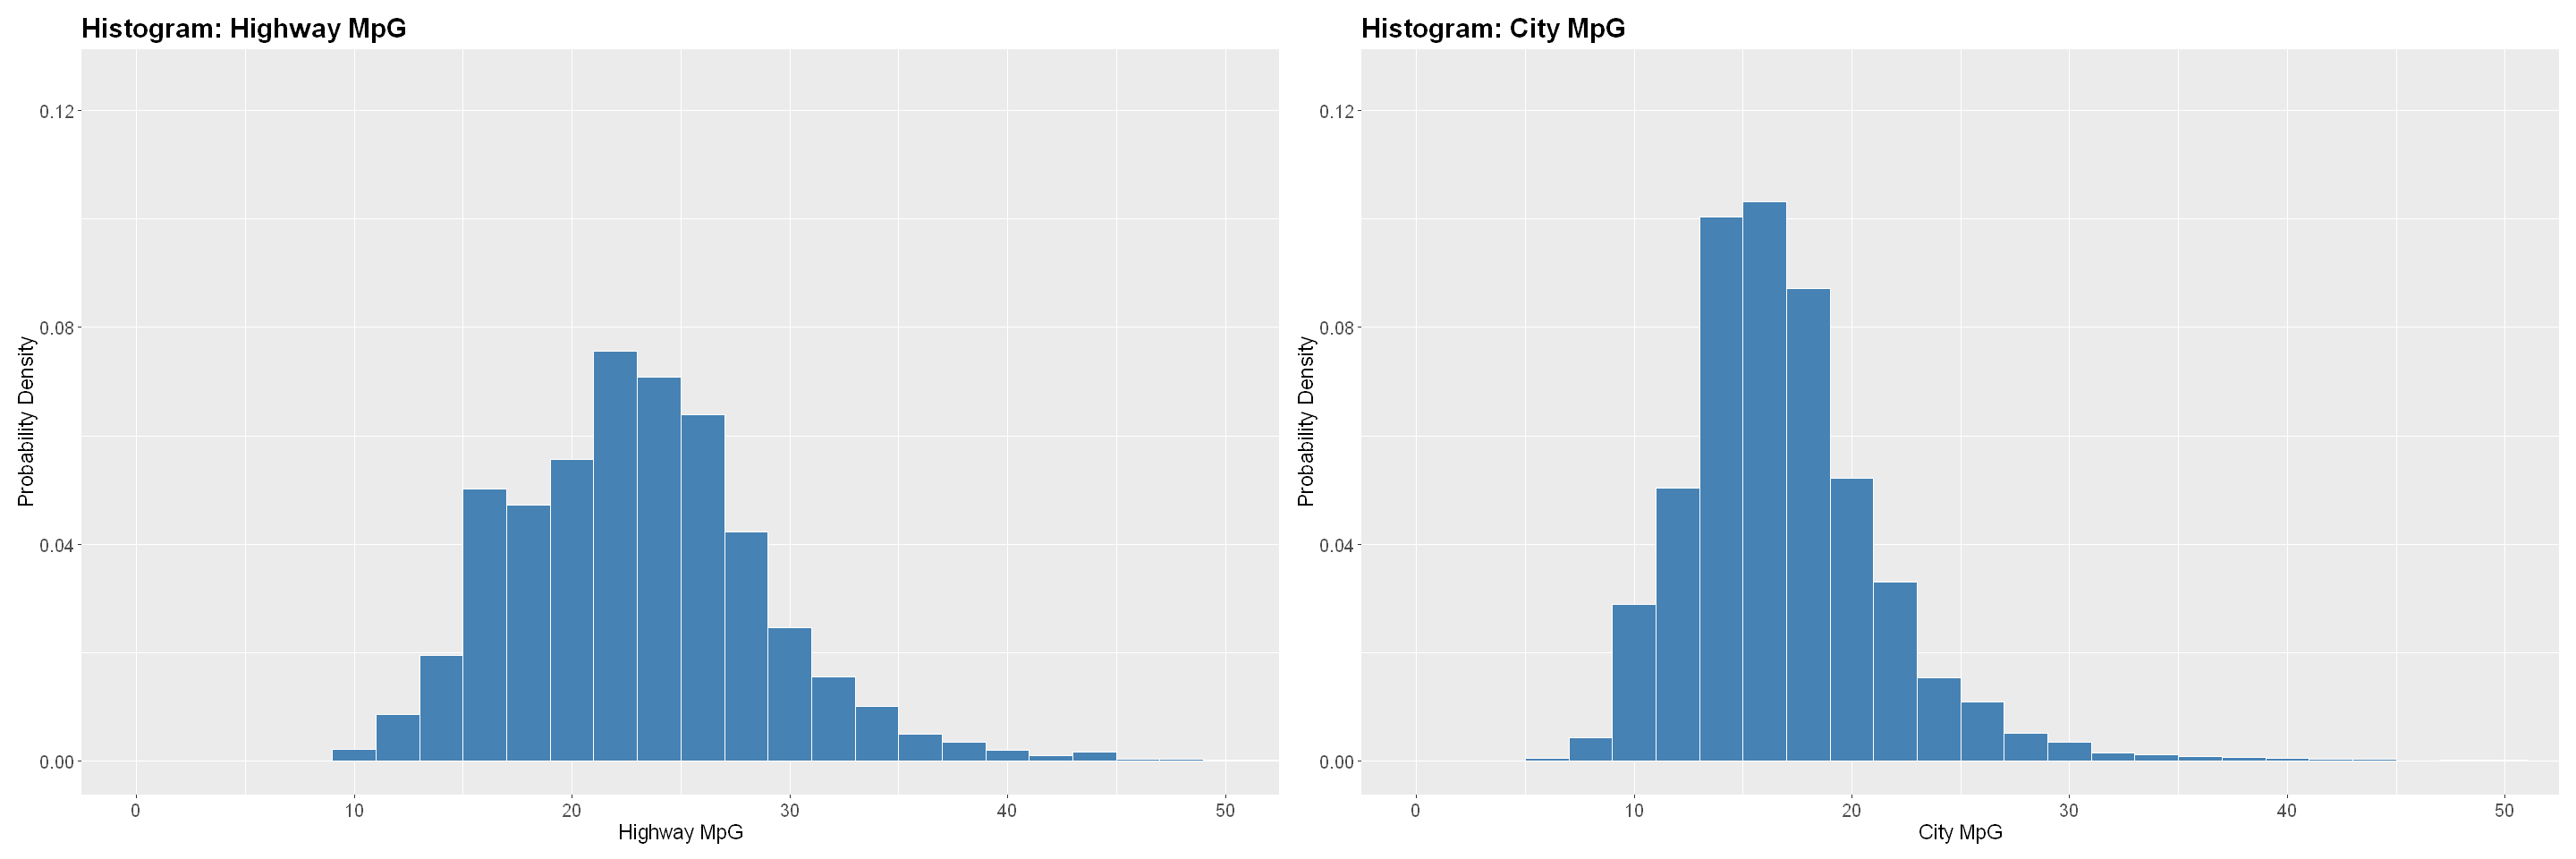

In [2]:
options(repr.plot.width = 24, repr.plot.height = 8)

# Histograms for Highway MpG
p1 <- ggplot(data, aes(x = hwy, y = ..density..)) +
  geom_histogram(binwidth = 2, fill = "steelblue", color = "white") +
  labs(title = "Histogram: Highway MpG", x = "Highway MpG", y = "Probability Density") +
  coord_cartesian(xlim = c(0, 50), ylim = c(0, 0.125)) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text  = element_text(size = 12),
    strip.text = element_text(size = 13, face = "bold")
  )

# Histograms for City MpG
p2 <- ggplot(data, aes(x = cty, y = ..density..)) +
  geom_histogram(binwidth = 2, fill = "steelblue", color = "white") +
  labs(title = "Histogram: City MpG", x = "City MpG", y = "Probability Density") +
  coord_cartesian(xlim = c(0, 50), ylim = c(0, 0.125)) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text  = element_text(size = 12),
    strip.text = element_text(size = 13, face = "bold")
  )

# Combine the two histograms
p1 | p2

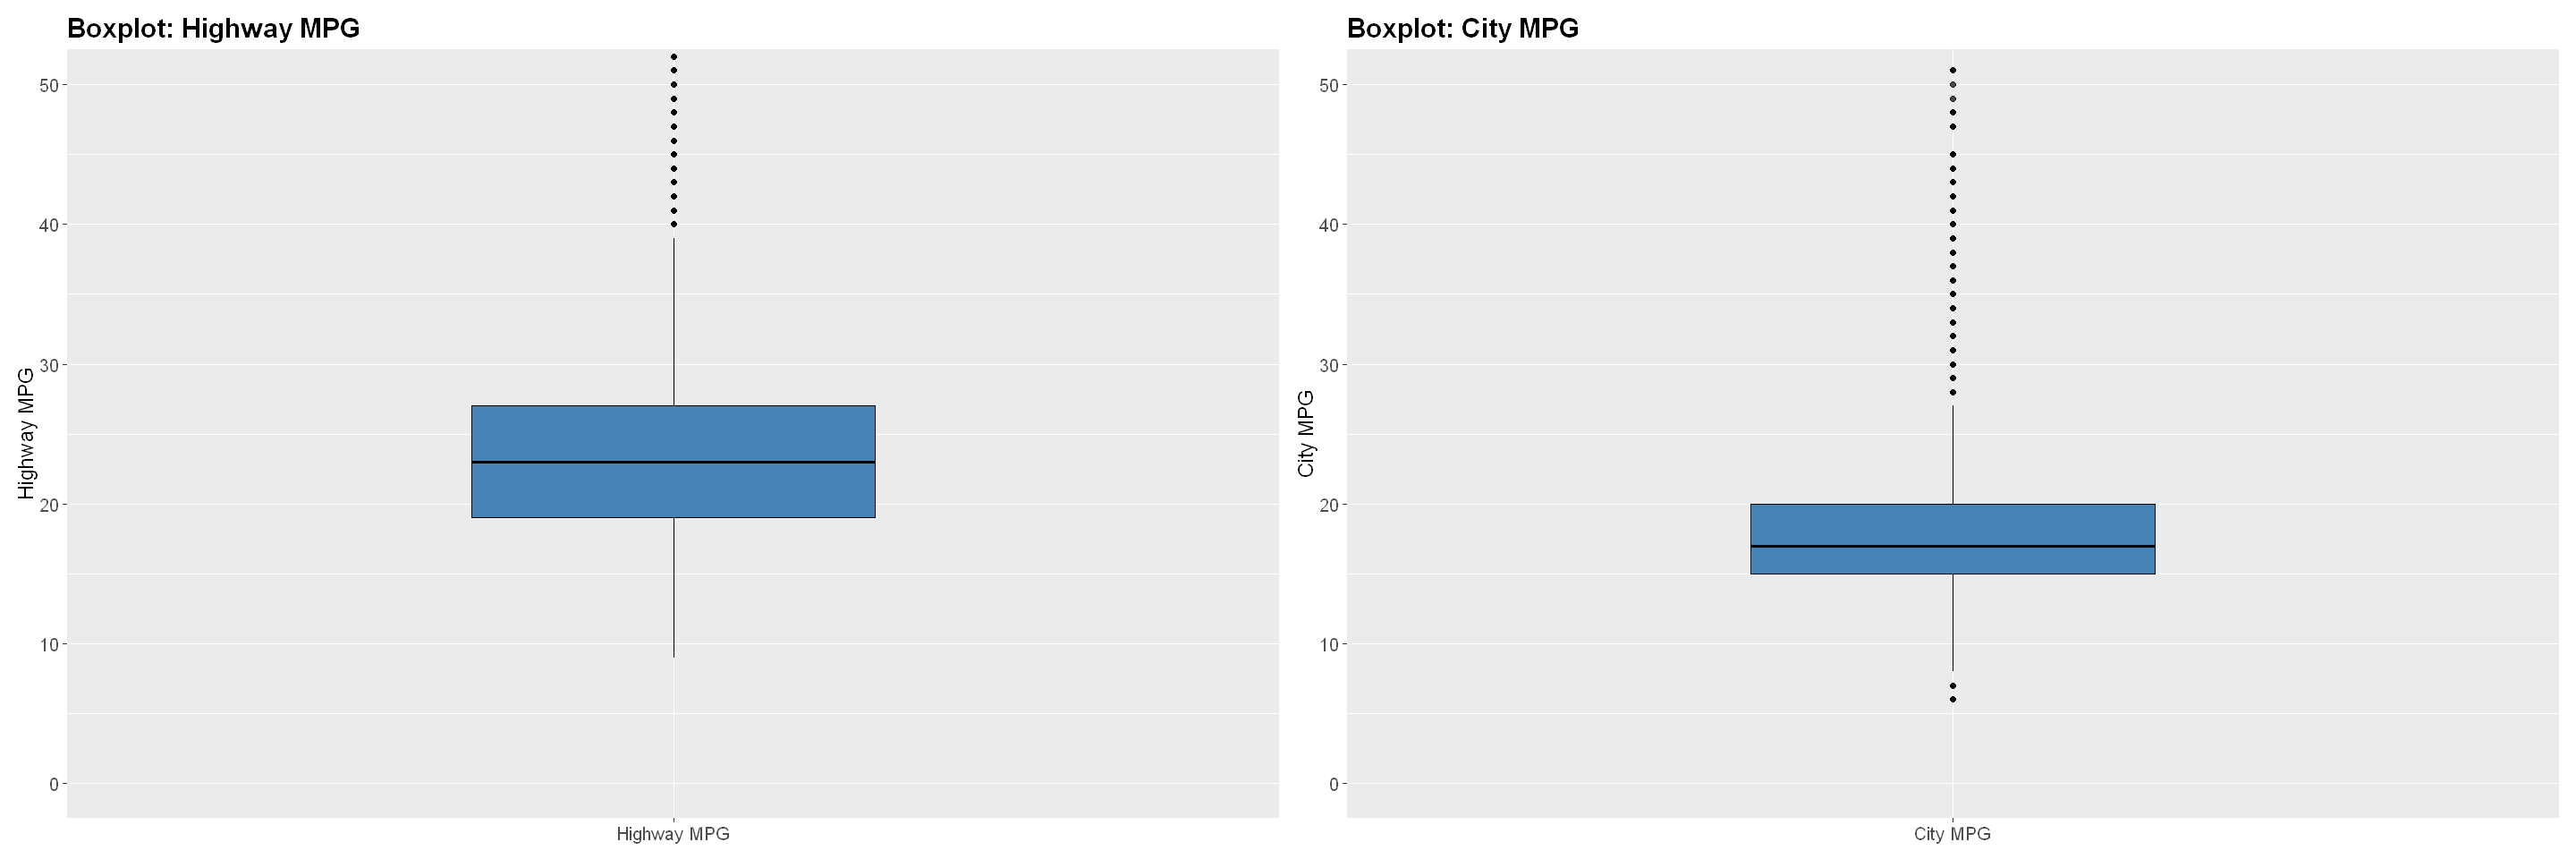

In [3]:
options(repr.plot.width = 24, repr.plot.height = 8)

# Boxplot for Highway MpG
p1 <- ggplot(data, aes(x = "Highway MPG", y = hwy)) +
  geom_boxplot(fill = "steelblue", color = "black", outlier.alpha = 0.7, width = 0.4) +
  labs(title = "Boxplot: Highway MPG", x = NULL, y = "Highway MPG") +
  coord_cartesian(ylim = c(0, 50)) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text  = element_text(size = 12),
    strip.text = element_text(size = 13, face = "bold")
  )

# Boxplot for City MpG
p2 <- ggplot(data, aes(x = "City MPG", y = cty)) +
  geom_boxplot(fill = "steelblue", color = "black", outlier.alpha = 0.7, width = 0.4) +
  labs(title = "Boxplot: City MPG", x = NULL, y = "City MPG") +
  coord_cartesian(ylim = c(0, 50)) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text  = element_text(size = 12),
    strip.text = element_text(size = 13, face = "bold")
  )

# Combine the two boxplots
p1 | p2

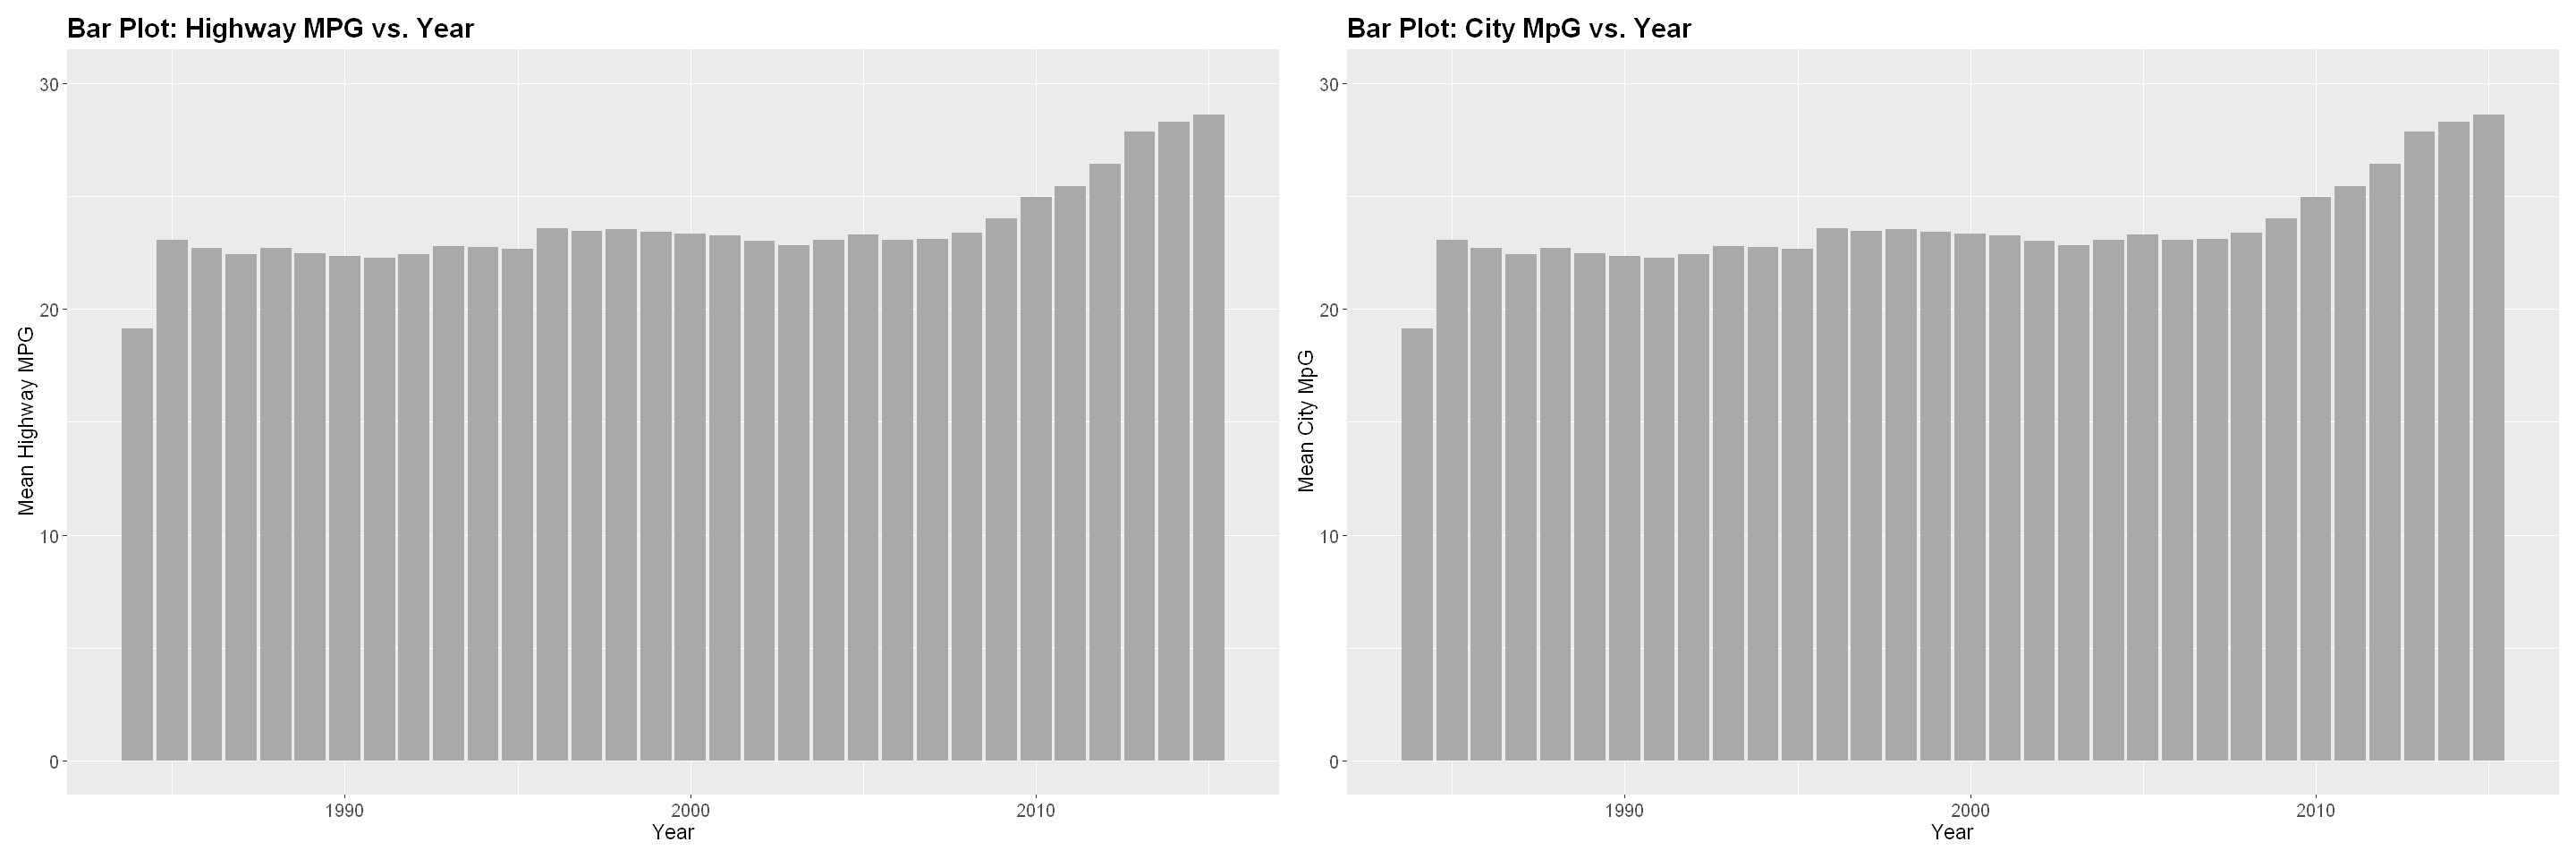

In [4]:
options(repr.plot.width = 24, repr.plot.height = 8)

# Prepare data
df <- fueleconomy::vehicles %>%
  group_by(year) %>%
  summarise(mean_hwy_mpg = mean(hwy), mean_cty_mpg = mean(cty))
  
# Create bar plots for mean highway and city MPG by year
p1 <- ggplot(df, aes(x = year)) +
  geom_bar(aes(y = mean_hwy_mpg), stat = "identity", position = "dodge", fill = "darkgrey") +
  labs(
    title = "Bar Plot: Highway MPG vs. Year",
    x = "Year",
    y = "Mean Highway MPG"
  ) +
  ylim(c(0, 30)) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

p2 <- ggplot(df, aes(x = year)) +
  geom_bar(aes(y = mean_hwy_mpg), stat = "identity", position = "dodge", fill = "darkgrey") +
  labs(
    title = "Bar Plot: City MpG vs. Year",
    x = "Year",
    y = "Mean City MpG"
  ) +
  ylim(c(0, 30)) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

# Combine the two bar plots
p1 | p2

Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_point()`)."


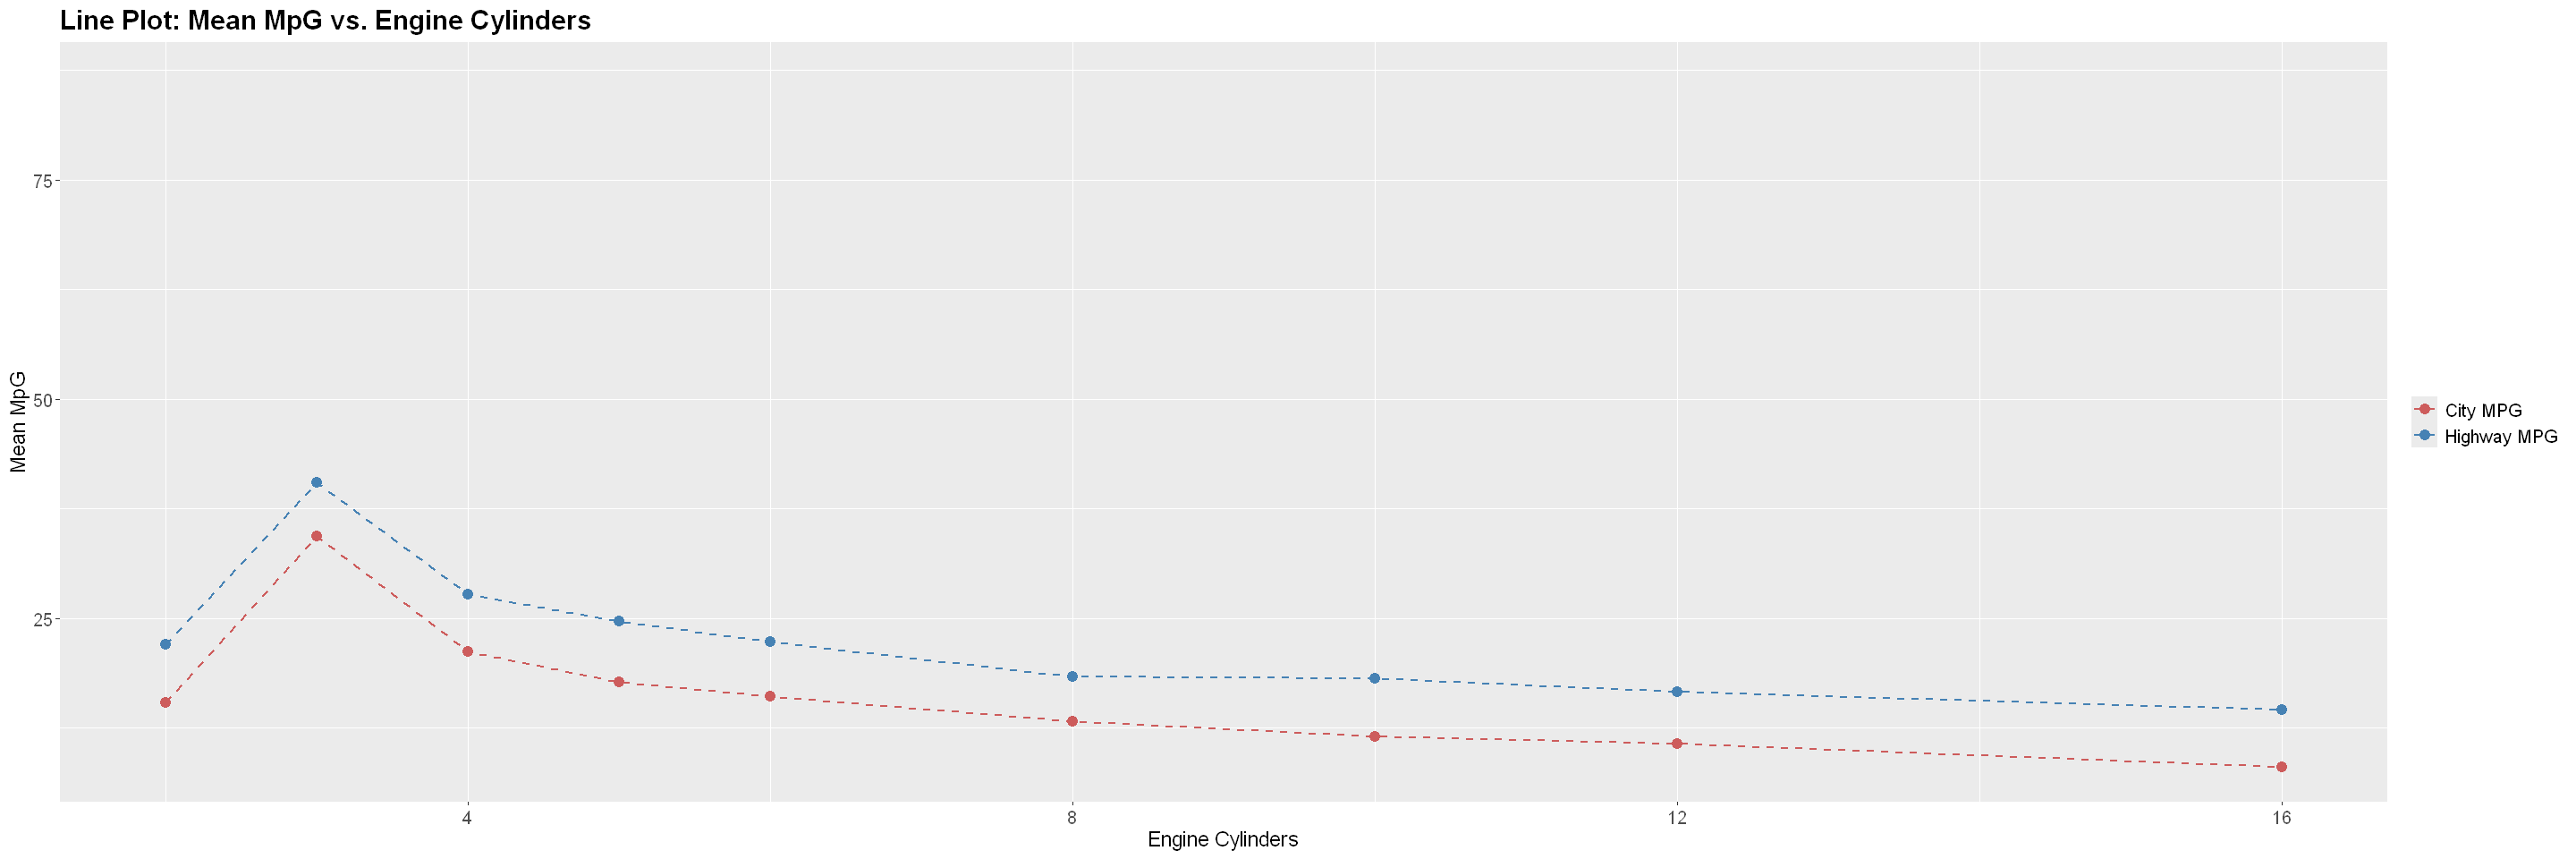

In [5]:
options(repr.plot.width = 24, repr.plot.height = 8)

# Prepare data
df <- fueleconomy::vehicles %>%
  group_by(cyl) %>%
  summarise(mean_hwy_mpg = mean(hwy), mean_cty_mpg = mean(cty))

# Create a line plot for highway MpG and city MpG by engine cylinders
ggplot(df, aes(x = cyl)) +
  # Highway MPG
  geom_line(aes(y = mean_hwy_mpg, color = "Highway MPG", linetype = "Highway MPG"), linewidth = 0.75) +
  geom_point(aes(y = mean_hwy_mpg, color = "Highway MPG"), size = 3) +
  # City MPG
  geom_line(aes(y = mean_cty_mpg, color = "City MPG", linetype = "City MPG"), linewidth = 0.75) +
  geom_point(aes(y = mean_cty_mpg, color = "City MPG"), size = 3) +
  scale_color_manual(values = c("Highway MPG" = "steelblue", "City MPG" = "indianred")) +
  scale_linetype_manual(values = c("Highway MPG" = "dashed", "City MPG" = "dashed")) +
  labs(
    title = "Line Plot: Mean MpG vs. Engine Cylinders",
    x = "Engine Cylinders",
    y = "Mean MpG",
    color = NULL, linetype = NULL
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text  = element_text(size = 12),
    legend.text = element_text(size = 12)
  )


Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_point()`)."


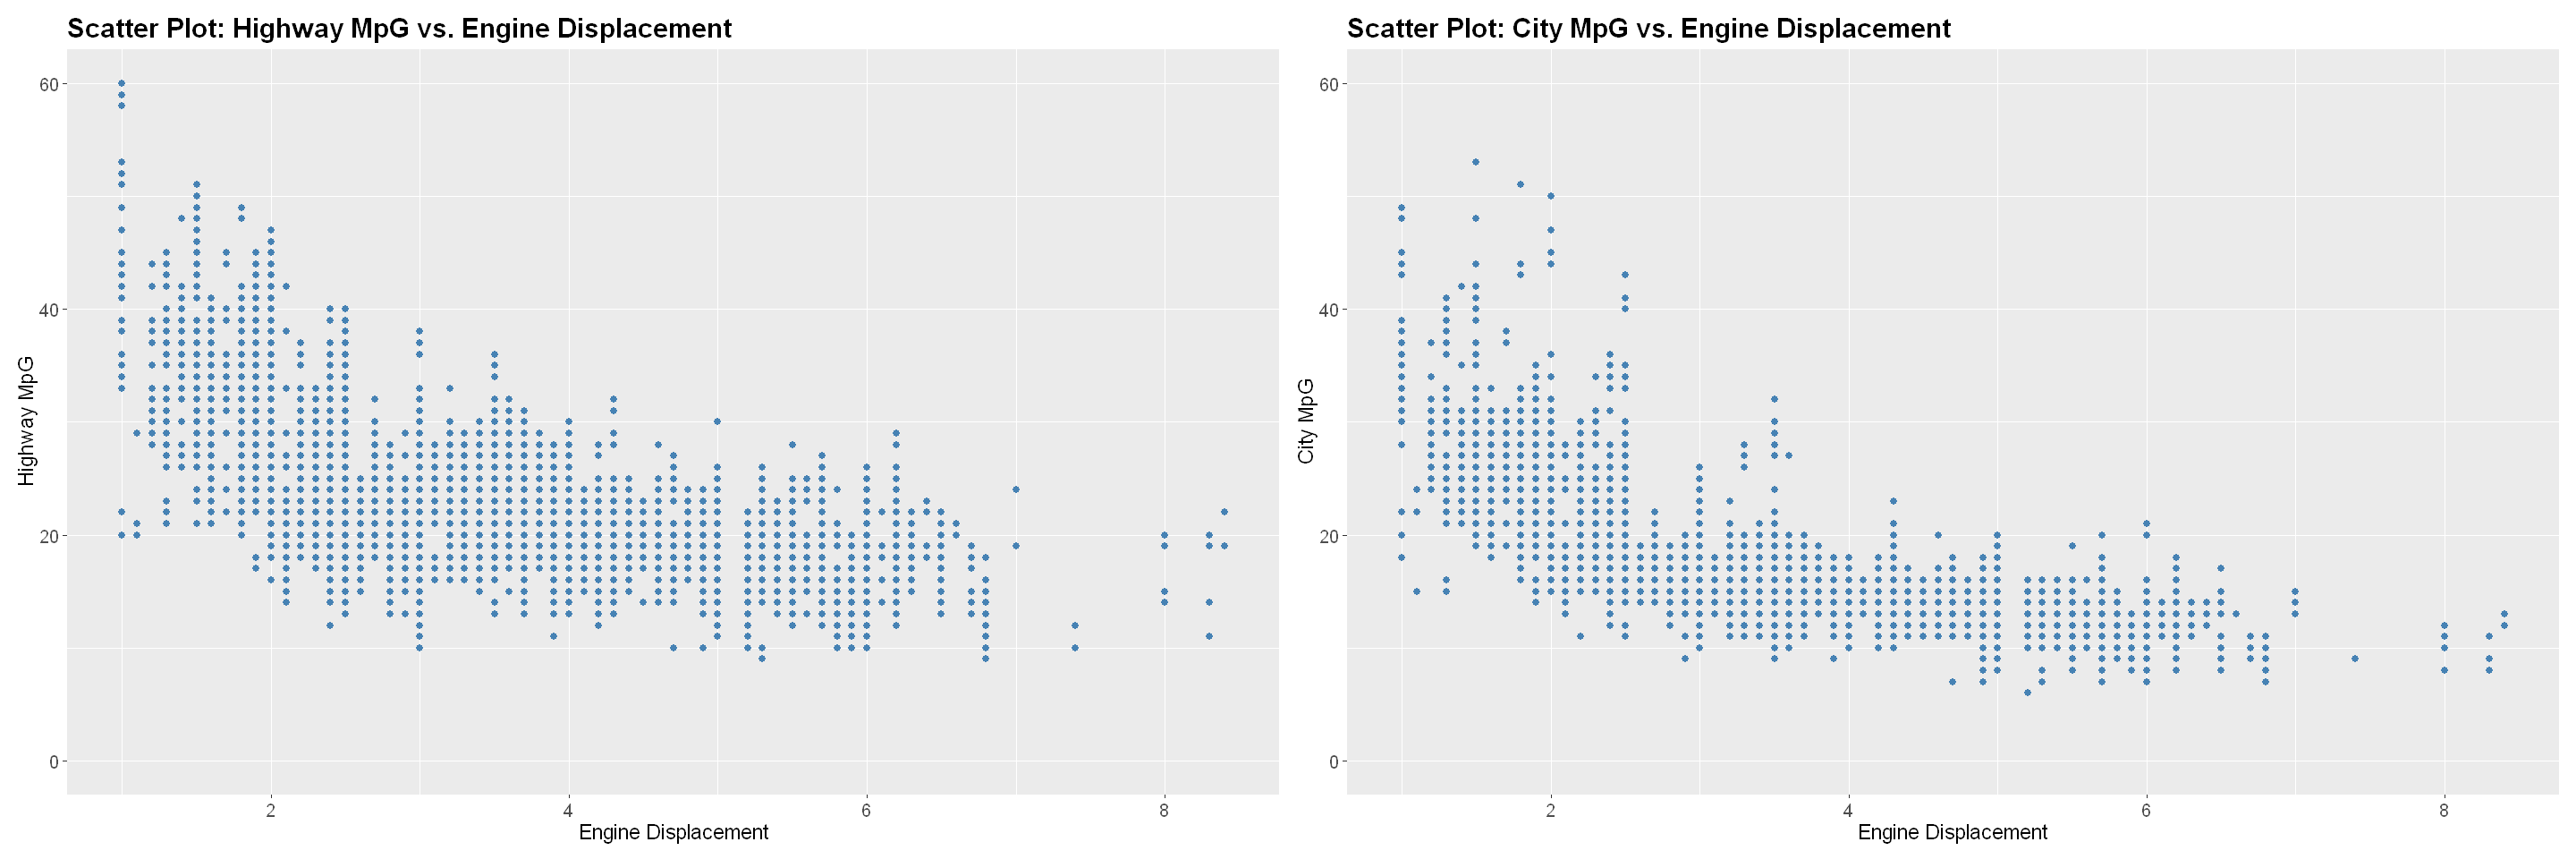

In [6]:
options(repr.plot.width = 24, repr.plot.height = 8)
  
# Scatter plot of highway MpG vs engine displacement
p1 <- ggplot(data, aes(x = displ, y = hwy)) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot: Highway MpG vs. Engine Displacement",
    x = "Engine Displacement",
    y = "Highway MpG"
  ) +
  ylim(c(0, 60)) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

# Scatter plot of city MpG vs engine displacement
p2 <- ggplot(data, aes(x = displ, y = cty)) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot: City MpG vs. Engine Displacement",
    x = "Engine Displacement",
    y = "City MpG"
  ) +
  ylim(c(0, 60)) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

  # Combine the two scatter plots
p1 | p2

In [7]:
data <- fueleconomy::vehicles
# Correlation values
message("Correlation - Highway MpG vs. Vehicle Year         :   ", round(cor(data$hwy, data$year, use = "complete.obs"), digits = 3))
message("Correlation - City MpG vs. Vehicle Year            :   ", round(cor(data$cty, data$year, use = "complete.obs"), digits = 3))
message("Correlation - Highway MpG vs. Cylinder Count       :   ", round(cor(data$hwy, data$cyl, use = "complete.obs"), digits = 3))
message("Correlation - City MpG vs. Cylinder Count          :   ", round(cor(data$cty, data$cyl, use = "complete.obs"), digits = 3))
message("Correlation - Highway MpG vs. Engine Displacement  :   ", round(cor(data$hwy, data$displ, use = "complete.obs"), digits = 3))
message("Correlation - City MpG vs. Engine Displacement     :   ", round(cor(data$cty, data$displ, use = "complete.obs"), digits = 3))

Correlation - Highway MpG vs. Vehicle Year         :   0.21

Correlation - City MpG vs. Vehicle Year            :   0.107

Correlation - Highway MpG vs. Cylinder Count       :   -0.653

Correlation - City MpG vs. Cylinder Count          :   -0.712

Correlation - Highway MpG vs. Engine Displacement  :   -0.718

Correlation - City MpG vs. Engine Displacement     :   -0.747



---

2. **Linear Regression** *(18)*

For the `vehicles` dataset from the `fueleconomy` package in `R`, 

a. develop the following models *(5)*

- `cty` = $\beta_0$ + $\beta_1$`year` + $\beta_2$`cyl` + $\beta_3X_3$ `displ`

- `hwy` = $\beta_0$ + $\beta_1$`year` + $\beta_2$`cyl` + $\beta_3X_3$ `displ`

b. for the two models, compute *(6)*

- Sum of Squares Total (SST)

- Sum of Squares Regression (SSR)

- Sum of Squared Errors (SSE)
  
- Residual Standard Error (RSE)
  
- R-squared ($R^2$)
  
- Adjusted R-squared ($\bar{R}^2$)

c. for the two models, *(7)*

- develop residuals plot

- comment upon the validity of the assumptions of linear regression

(Hint: To comment upon multicollinearity, develop pairwise correlation for the exogneous variables)



Highway MpG Model Statistics:



Call:
lm(formula = hwy ~ year + cyl + displ, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3654  -2.2787  -0.3746   1.8862  30.0966 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.820e+02  4.351e+00  -64.82   <2e-16 ***
year         1.583e-01  2.181e-03   72.61   <2e-16 ***
cyl         -3.487e-01  2.674e-02  -13.04   <2e-16 ***
displ       -2.692e+00  3.410e-02  -78.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.7 on 33380 degrees of freedom
  (58 observations deleted due to missingness)
Multiple R-squared:  0.5823,	Adjusted R-squared:  0.5823 
F-statistic: 1.551e+04 on 3 and 33380 DF,  p-value: < 2.2e-16



City MpG Model Statistics:



Call:
lm(formula = cty ~ year + cyl + displ, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5169 -1.6912 -0.4180  0.9786 30.1424 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.273e+02  3.443e+00  -36.98   <2e-16 ***
year         7.728e-02  1.726e-03   44.79   <2e-16 ***
cyl         -6.605e-01  2.116e-02  -31.22   <2e-16 ***
displ       -1.792e+00  2.698e-02  -66.40   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.928 on 33380 degrees of freedom
  (58 observations deleted due to missingness)
Multiple R-squared:  0.5915,	Adjusted R-squared:  0.5915 
F-statistic: 1.611e+04 on 3 and 33380 DF,  p-value: < 2.2e-16



Highway MpG Model Statistics:


Warning message in data$hwy - model_hwy$fitted.values:
"longer object length is not a multiple of shorter object length"


 SST               : 1290211 
 SSR               : 637412.6 
 SSE               : 1052863 
 RSE               : 5.61 
 R-squared         : 0.494 
 Adjusted R-squared: 0.494 

City MpG Model Statistics:


Warning message in data$cty - model_cty$fitted.values:
"longer object length is not a multiple of shorter object length"


 SST               : 1042044 
 SSR               : 414955.7 
 SSE               : 900466.4 
 RSE               : 5.19 
 R-squared         : 0.398 
 Adjusted R-squared: 0.398 


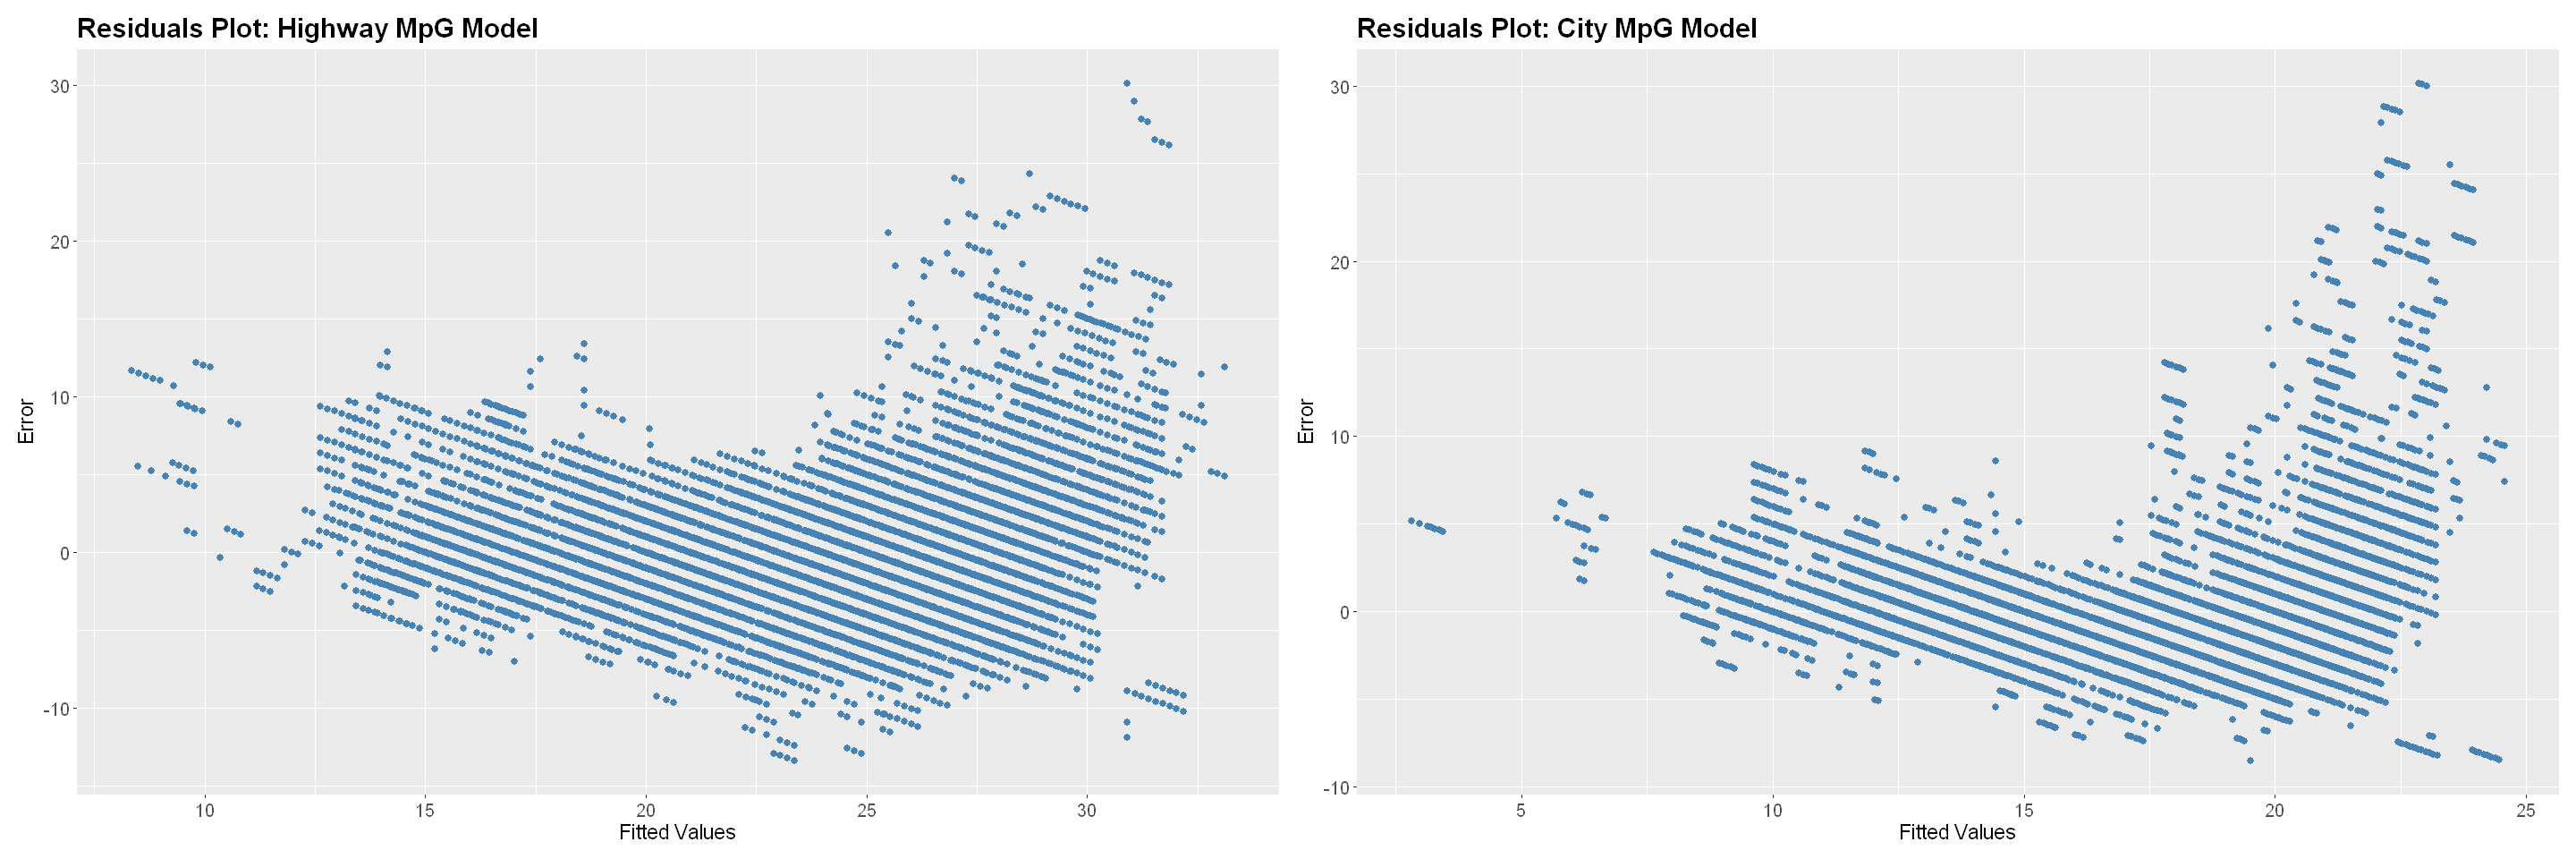

In [8]:
# Model
model_hwy <- lm(hwy ~ year + cyl + displ, data = data)
model_cty <- lm(cty ~ year + cyl + displ, data = data)

# Summary
cat("\nHighway MpG Model Statistics:\n")
summary(model_hwy)
cat("\nCity MpG Model Statistics:\n")
summary(model_cty)

# Statistics
cat("\nHighway MpG Model Statistics:\n")
sst <- sum((data$hwy - mean(data$hwy))^2)
ssr <- sum((model_hwy$fitted.values - mean(data$hwy))^2)
sse <- sum((data$hwy - model_hwy$fitted.values)^2)
rse <- sqrt(sse / (nrow(data) - 2))
Rsquared <- ssr / sst
AdjRsquared <- 1 - (1 - Rsquared) * (nrow(data) - 1) / (nrow(data) - 2)
cat(" SST               :", round(sst, 2), "\n")
cat(" SSR               :", round(ssr, 2), "\n")
cat(" SSE               :", round(sse, 2), "\n")
cat(" RSE               :", round(rse, 2), "\n")
cat(" R-squared         :", round(Rsquared, 3), "\n")
cat(" Adjusted R-squared:", round(AdjRsquared, 3), "\n")

cat("\nCity MpG Model Statistics:\n")
sst <- sum((data$cty - mean(data$cty))^2)
ssr <- sum((model_cty$fitted.values - mean(data$cty))^2)
sse <- sum((data$cty - model_cty$fitted.values)^2)
rse <- sqrt(sse / (nrow(data) - 2))
Rsquared <- ssr / sst
AdjRsquared <- 1 - (1 - Rsquared) * (nrow(data) - 1) / (nrow(data) - 2)
cat(" SST               :", round(sst, 2), "\n")
cat(" SSR               :", round(ssr, 2), "\n")
cat(" SSE               :", round(sse, 2), "\n")
cat(" RSE               :", round(rse, 2), "\n")
cat(" R-squared         :", round(Rsquared, 3), "\n")
cat(" Adjusted R-squared:", round(AdjRsquared, 3), "\n")

# Residuals Plot
options(repr.plot.width = 24, repr.plot.height = 8)
df <- data.frame(
  fitted = fitted(model_hwy),
  resid  = residuals(model_hwy)
)
p1 <- ggplot(df, aes(x = fitted(model_hwy), y = resid(model_hwy))) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Residuals Plot: Highway MpG Model",
    x = "Fitted Values",
    y = "Error"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )
df <- data.frame(
  fitted = fitted(model_cty),
  resid  = residuals(model_cty)
)
p2 <- ggplot(df, aes(x = fitted(model_cty), y = resid(model_cty))) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Residuals Plot: City MpG Model",
    x = "Fitted Values",
    y = "Error"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

# Combine the two residuals plots
p1 | p2

In [9]:
message("Correlation - X1 vs. X2: ", round(cor(data$year, data$cyl), digits = 3))
message("Correlation - X2 vs. X3: ", round(cor(data$cyl, data$displ), digits = 3))
message("Correlation - X3 vs. X1: ", round(cor(data$displ, data$year), digits = 3))

Correlation - X1 vs. X2: NA

Correlation - X2 vs. X3: NA

Correlation - X3 vs. X1: NA



For both models,

1. **Linearity**: *Violated* – The residuals also show a systematic curved pattern, indicating model misspecification or omitted nonlinear terms. Consequently, the estimates are no longer unbiased.

2. **Independence**: *Satisfied* – Given that the vehicle observations are independent (i.e., each vehicle is a distinct data point and not repeated measures), this assumption holds.

3. **Homoskedasticity**: *Violated* – The residuals plots exhibit a funnel like shape, indicating heteroskedasticity. Consequently, the estimates are no longer efficient.

4. **No Multicollinearity**: *Violated* – Number of engine cylinders is highly correlated with engine displacement. Consequently, the model is no longer interpretable.

5. **Zero Conditional Mean of Errors**: *Violated* – The curvature of the residuals plot, combined with its heteroskedastic nature, indicates that the error term is related to the predictor(s), again pointing towards model misspecification. Consequently, the estimates are no longer unbiased.

---

3. **Symbolic Regression** *(5)*

For the `vehicles` dataset from the `fueleconomy` package in `R`, compare the following models explored via symbolic regression with the linear regression model developed in the previous question *(5)*

- `cty` = $\beta_0$ + $\beta_1$ $\text{I}($`year` $\geq 2010)$ + $\beta_2$ $\text{log}($`displ`$)$

- `hwy` = $\beta_0$ + $\beta_1$ $\text{I}($`year` $\geq 2010)$ + $\beta_2$ $\text{log}($`displ`$)$

(Hint: Compare the two set of models using model statistics and residual plots)

In [10]:
# Model
model_hwy <- lm(hwy ~ I + log(displ), data = data)
model_cty <- lm(cty ~ I + log(displ), data = data)

# Summary
cat("\nHighway MpG Model Statistics:\n")
summary(model_hwy)
cat("\nCity MpG Model Statistics:\n")
summary(model_cty)

# Statistics
cat("\nHighway MpG Model Statistics:\n")
sst <- sum((data$hwy - mean(data$hwy))^2)
ssr <- sum((model_hwy$fitted.values - mean(data$hwy))^2)
sse <- sum((data$hwy - model_hwy$fitted.values)^2)
rse <- sqrt(sse / (nrow(data) - 2))
Rsquared <- ssr / sst
AdjRsquared <- 1 - (1 - Rsquared) * (nrow(data) - 1) / (nrow(data) - 2)
cat(" SST               :", round(sst, 2), "\n")
cat(" SSR               :", round(ssr, 2), "\n")
cat(" SSE               :", round(sse, 2), "\n")
cat(" RSE               :", round(rse, 2), "\n")
cat(" R-squared         :", round(Rsquared, 3), "\n")
cat(" Adjusted R-squared:", round(AdjRsquared, 3), "\n")

cat("\nCity MpG Model Statistics:\n")
sst <- sum((data$cty - mean(data$cty))^2)
ssr <- sum((model_cty$fitted.values - mean(data$cty))^2)
sse <- sum((data$cty - model_cty$fitted.values)^2)
rse <- sqrt(sse / (nrow(data) - 2))
Rsquared <- ssr / sst
AdjRsquared <- 1 - (1 - Rsquared) * (nrow(data) - 1) / (nrow(data) - 2)
cat(" SST               :", round(sst, 2), "\n")
cat(" SSR               :", round(ssr, 2), "\n")
cat(" SSE               :", round(sse, 2), "\n")
cat(" RSE               :", round(rse, 2), "\n")
cat(" R-squared         :", round(Rsquared, 3), "\n")
cat(" Adjusted R-squared:", round(AdjRsquared, 3), "\n")

# Residuals Plot
options(repr.plot.width = 24, repr.plot.height = 8)
df <- data.frame(
  fitted = fitted(model_hwy),
  resid  = residuals(model_hwy)
)
p1 <- ggplot(df, aes(x = fitted(model_hwy), y = resid(model_hwy))) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Residuals Plot: Highway MpG Model",
    x = "Fitted Values",
    y = "Error"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )
df <- data.frame(
  fitted = fitted(model_cty),
  resid  = residuals(model_cty)
)
p2 <- ggplot(df, aes(x = fitted(model_cty), y = resid(model_cty))) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Residuals Plot: City MpG Model",
    x = "Fitted Values",
    y = "Error"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

# Combine the two residuals plots
p1 | p2

ERROR: Error in model.frame.default(formula = hwy ~ I + log(displ), data = data, : invalid type (closure) for variable 'I'


In [ ]:
message("Correlation - X1 vs. X2: ", round(cor(data$I, log(data$displ)), digits = 3))

Correlation - X1 vs. X2: 0.028



For both models,

1. **Linearity**: *Fairly Satisfied* – The residuals do not exhibit a strong systematic curved pattern. Consequently, the estimates are likely unbiased.

2. **Independence**: *Satisfied* – Given that the vehicle observations are independent (i.e., each vehicle is a distinct data point and not repeated measures), this assumption holds.

3. **Homoskedasticity**: *Violated* – The residuals plots exhibit a funnel like shape, indicating heteroskedasticity. Consequently, the estimates are no longer efficient.

4. **No Multicollinearity**: *Satisfied* – The model exhibits low correlation between exogneous variable. Consequently, the model is interpretable.

5. **Zero Conditional Mean of Errors**: *Fairly Satisfied* – The residuals appear to be fairly centered around zero with no systematic pattern, supporting the assumption that the expected value of errors given the explanatory variable is zero. Consequently, the estimates are unbiased.

---

4. **Logistic Regression** *(11)*

For the `TravelMode` dataset from the `AER.` package in `R`, explore how alternate-specific variables (`travel`: in-vehicle travel time, `wait`: terminal waiting time, `vcost`: vehicle operational cost, and `gcost`: generalized travel cost) as well as individual-specific variables (`income`: household income, and `size`: traveling party size) impact choice of travel mode (`air`, `train`, `bus`, `car`). To this end,

(Note: The data is availble in **long format** with one row per *individual–mode* combination.)

a. develop the model *(4)*

b. compute the following statistics *(7)*

- log-likelihood for the

    - equally likely model

    - market share model

    - estimated model

- estimated model R-squared with respect to the
    
    - equally-likely model

    - market share model

- estimated model adjusted R-squared with respect to the
    
    - equally-likely model

    - market share model

In [ ]:
# TravelMode Dataset - AER Package
## Load Packages
library(AER)
library(dplyr)
library(mlogit)

## Load the dataset (choices mutated from yes/no to TRUE/FALSE)
data("TravelMode", package = "AER")
long_data <- TravelMode %>%
  mutate(choice = choice == "yes")

model_data <- mlogit.data(
  long_data,
  choice = "choice",
  shape = "long",
  chid.var = "individual",
  alt.var = "mode"
)

In [ ]:
# Estimated Model
model <- mlogit(
  formula = choice ~ travel + wait + vcost + gcost | income + size,
  data = model_data,
  reflevel = "car"
)
summary(model)

# Model Statistics
I      <- max(as.integer(as.factor(long_data$individual))  )
J      <- length(unique(long_data$mode))
K      <- length(coef(model))
Y      <- long_data$bin
Z      <- long_data %>%
            filter(choice==TRUE) %>%
            count(mode, name = "n") %>%
            mutate(p = n / sum(n))
P      <- Z$p[model_data$alt] 
LL_EL  <- sum(Y * log(1/J))
LL_MS  <- sum(Y * log(P))
LL_MNL <- as.numeric(logLik(model))
R2_EL  <- 1 - (LL_MNL / LL_EL)
R2_MS  <- 1 - (LL_MNL / LL_MS)
AR2_EL <- 1 - ((LL_MNL - K) / LL_EL)
AR2_MS <- 1 - ((LL_MNL - K) / LL_MS)

# --- Output ---
cat("\n--- Log-likelihoods ---\n")
cat(sprintf("EL  : %0.3f\n", LL_EL))
cat(sprintf("MS  : %0.3f\n", LL_MS))
cat(sprintf("MNL : %0.3f\n", LL_MNL))
cat("\n--- McFadden R^2 ---\n")
cat(sprintf("R2 vs EL : %0.4f\n", R2_EL))
cat(sprintf("R2 vs MS : %0.4f\n", R2_MS))
cat("\n--- Adjusted McFadden R^2 ---\n")
cat(sprintf("Adj R2 vs EL : %0.4f (K = %d)\n", AR2_EL, K))
cat(sprintf("Adj R2 vs MS : %0.4f (K = %d)\n", AR2_MS, K))


Call:
mlogit(formula = choice ~ travel + wait + vcost + gcost | income + 
    size, data = model_data, reflevel = "car", method = "nr")

Frequencies of alternatives:choice
    car     air   train     bus 
0.28095 0.27619 0.30000 0.14286 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 3.48E-07 
gradient close to zero 

Coefficients :
                    Estimate Std. Error z-value  Pr(>|z|)    
(Intercept):air    5.2865000  1.2026299  4.3958 1.104e-05 ***
(Intercept):train  5.7082954  0.7266516  7.8556 3.997e-15 ***
(Intercept):bus    4.7163288  0.8238724  5.7246 1.037e-08 ***
travel            -0.0102498  0.0034179 -2.9988   0.00271 ** 
wait              -0.1025547  0.0113755 -9.0154 < 2.2e-16 ***
vcost             -0.0533528  0.0252825 -2.1103   0.03484 *  
gcost              0.0464263  0.0249000  1.8645   0.06225 .  
income:air         0.0080781  0.0134186  0.6020   0.54717    
income:train      -0.0594981  0.0148925 -3.9952 6.465e-05 ***
income:bus        -0.0199412  0.0163648 -1.


--- Log-likelihoods ---
EL  : 0.000
MS  : 0.000
MNL : -170.688

--- McFadden R^2 ---
R2 vs EL : Inf
R2 vs MS : Inf

--- Adjusted McFadden R^2 ---
Adj R2 vs EL : Inf (K = 13)
Adj R2 vs MS : Inf (K = 13)
